In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import scipy

from sklearn.linear_model import LogisticRegression, LinearRegression

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score
from sklearn.metrics import (r2_score, mean_squared_error, accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, roc_curve, precision_recall_curve, make_scorer,
                             confusion_matrix, multilabel_confusion_matrix, ConfusionMatrixDisplay)

%matplotlib inline

In [2]:
df = pd.read_csv('grad.csv'); df.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [3]:
y = df.admit
X = df[['gre', 'gpa', 'rank']]

In [4]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: admit, dtype: int64

In [5]:
X.head()

,gre,gpa,rank
0,380,3.61,3
1,660,3.67,3
2,800,4.00,1
3,640,3.19,4
4,520,2.93,4


In [6]:
df.describe()

,admit,gre,gpa,rank
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   admit   400 non-null    int64  
 1   gre     400 non-null    int64  
 2   gpa     400 non-null    float64
 3   rank    400 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 12.6 KB


In [8]:
dfrank = pd.get_dummies(df["rank"])
dfrank.head()

,1,2,3,4
0,0,0,1,0
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1


In [9]:
DF2 = pd.concat([df, dfrank], axis=1)
DF2.head()

,admit,gre,gpa,rank,1,2,3,4
0,0,380,3.61,3,0,0,1,0
1,1,660,3.67,3,0,0,1,0
2,1,800,4.00,1,1,0,0,0
3,1,640,3.19,4,0,0,0,1
4,0,520,2.93,4,0,0,0,1


In [10]:
DF2.rename(columns = {'1':'rank1', '2':'rank2','3':'rank3','4':'rank4'}, inplace = True)
DF2.head()

,admit,gre,gpa,rank,1,2,3,4
0,0,380,3.61,3,0,0,1,0
1,1,660,3.67,3,0,0,1,0
2,1,800,4.00,1,1,0,0,0
3,1,640,3.19,4,0,0,0,1
4,0,520,2.93,4,0,0,0,1


In [11]:
df3 = DF2.drop(columns=['gre', 'gpa', 'rank'])

<AxesSubplot:ylabel='Count'>

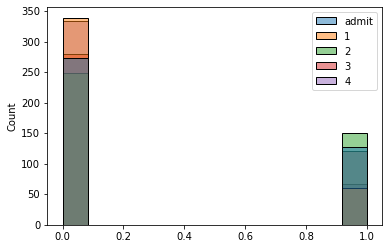

In [12]:
sns.histplot(data=df3, )

<AxesSubplot:xlabel='admit', ylabel='gre'>

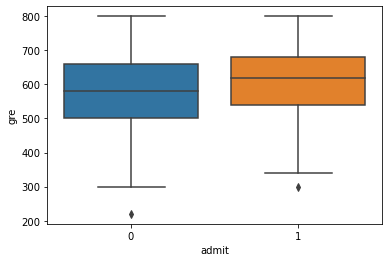

In [13]:
sns.boxplot(data=df, x="admit", y="gre")

In [14]:
X= df[['gre','gpa','rank']]
y= df[["admit"]]

In [15]:
X.head()

,gre,gpa,rank
0,380,3.61,3
1,660,3.67,3
2,800,4.00,1
3,640,3.19,4
4,520,2.93,4


In [16]:
y.head()

,admit
0,0
1,1
2,1
3,1
4,0


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)

In [18]:
log_reg= LogisticRegression()
log_reg.fit(X_train, y_train)

C:\Users\ellomo19\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [19]:
y_pred= log_reg.predict_proba(X_test)[:,1]

In [20]:
y_pred

array([0.33799488, 0.36561373, 0.32326136, 0.14405701, 0.307424  ,
       0.29598643, 0.21022779, 0.30128863, 0.32888719, 0.44064552,
       0.16103045, 0.29782771, 0.52829153, 0.31566677, 0.14151952,
       0.06064737, 0.23054676, 0.62460901, 0.4950387 , 0.39332494,
       0.43966468, 0.22061294, 0.18833536, 0.28006344, 0.19471545,
       0.38265656, 0.5248861 , 0.09797221, 0.50115986, 0.25706137,
       0.5065573 , 0.08989246, 0.27334655, 0.3595644 , 0.36449187,
       0.19673048, 0.10053998, 0.19812332, 0.46919732, 0.26601508,
       0.10780896, 0.29764797, 0.38272426, 0.22424808, 0.10425068,
       0.36924767, 0.16667965, 0.37011537, 0.38271719, 0.34349511,
       0.55166859, 0.15661935, 0.41344595, 0.31265528, 0.30284612,
       0.5858315 , 0.25027392, 0.3474056 , 0.33330146, 0.29692991,
       0.66419934, 0.32544551, 0.50962089, 0.2993086 , 0.09938829,
       0.47125183, 0.12607519, 0.42146829, 0.46820612, 0.3290203 ,
       0.42757543, 0.54863503, 0.13561361, 0.34921941, 0.27256

In [23]:
accuracy = cross_val_score(log_reg, X, y, scoring='accuracy', cv = 5)
accuracy

C:\Users\ellomo19\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ellomo19\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ellomo19\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ellomo19\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

array([0.7125, 0.725 , 0.7   , 0.6875, 0.6875])

In [24]:
precision = cross_val_score(log_reg, X, y, scoring='precision', cv = 5)
precision

C:\Users\ellomo19\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ellomo19\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ellomo19\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ellomo19\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

array([0.6       , 0.66666667, 0.55555556, 0.6       , 0.54545455])

In [25]:
recall = cross_val_score(log_reg, X, y, scoring='recall', cv = 5)
recall

C:\Users\ellomo19\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ellomo19\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ellomo19\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ellomo19\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

array([0.24      , 0.24      , 0.2       , 0.11538462, 0.23076923])

In [26]:
index_values = [0,1,2,3,4]
column_values = ['Accuracy', 'Precision', 'Recall']

In [43]:
val = pd.DataFrame(data=(accuracy, precision, recall))
validation = val.T
validation

,0,1,2
0,0.7125,0.600000,0.240000
1,0.7250,0.666667,0.240000
2,0.7000,0.555556,0.200000
3,0.6875,0.600000,0.115385
4,0.6875,0.545455,0.230769


In [44]:
validation.rename(columns = {0:'Accuracy', 1:'Precision', 2:'Recall'}, inplace = True)
validation

,Accuracy,Precision,Recall
0,0.7125,0.600000,0.240000
1,0.7250,0.666667,0.240000
2,0.7000,0.555556,0.200000
3,0.6875,0.600000,0.115385
4,0.6875,0.545455,0.230769


In [47]:
df2 = pd.get_dummies(df["rank"], prefix=['ranking'])

In [61]:
ranking = pd.get_dummies(df["rank"])
df_parte2 = pd.concat([df, ranking], axis=1)

In [63]:
df_parte2 = df_parte2.drop(columns=["rank"]) 

In [70]:
df_parte2

,admit,gre,gpa,1,2,3,4
0,0,380,3.61,0,0,1,0
1,1,660,3.67,0,0,1,0
2,1,800,4.00,1,0,0,0
3,1,640,3.19,0,0,0,1
4,0,520,2.93,0,0,0,1
...,...,...,...,...,...,...,...
395,0,620,4.00,0,1,0,0
396,0,560,3.04,0,0,1,0
397,0,460,2.63,0,1,0,0
398,0,700,3.65,0,1,0,0


In [72]:
X2= df_parte2[['gre','gpa',1,2,3,4]]
y2= df_parte2[["admit"]]

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.30, random_state=40)
log_reg2= LogisticRegression()
log_reg2.fit(X_train, y_train)

C:\Users\ellomo19\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ellomo19\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ellomo19\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_it

LogisticRegression()

In [77]:
accuracy2 = cross_val_score(log_reg, X2, y2, scoring='accuracy', cv = 5)
recall2 = cross_val_score(log_reg, X2, y2, scoring='recall', cv = 5)
precision2 = cross_val_score(log_reg, X2, y2, scoring='precision', cv = 5)

C:\Users\ellomo19\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ellomo19\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ellomo19\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_it

C:\Users\ellomo19\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ellomo19\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ellomo19\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_it

In [78]:
index_values = [0,1,2,3,4]
column_values = ['Accuracy', 'Precision', 'Recall']
val = pd.DataFrame(data=(accuracy2, precision2, recall2))
validation = val.T
validation

,0,1,2
0,0.7250,0.666667,0.240000
1,0.7125,0.625000,0.200000
2,0.7250,0.714286,0.200000
3,0.6750,0.500000,0.076923
4,0.7125,0.615385,0.307692


In [79]:
accuracy.mean()

0.7100000000000001

In [80]:
precision.mean()

0.6242673992673993

In [81]:
recall.mean()

0.20492307692307693

In [82]:
accuracy2.mean()

0.7100000000000001

In [86]:
precision2.mean()

0.6242673992673993

In [84]:
recall2.mean()

0.20492307692307693